In [50]:
import requests as rq
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import calendar

from collections import defaultdict

from datetime import datetime

#nltk.download('vader_lexicon')



In [2]:
## EXAMPLE WORLD CUP REQUEST

import requests as rq
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import pandas as pd

url_test = f"https://api.pushshift.io/reddit/submission/search/?q=world cup&sort_type=score&sort=desc&size=100"
data = rq.get(url_test).json()
print(data)

{'data': [{'author': 'JF_112', 'author_flair_css_class': None, 'author_flair_richtext': [], 'author_flair_text': None, 'author_flair_type': 'text', 'can_mod_post': False, 'contest_mode': False, 'created_utc': 1529450133, 'domain': 'i.imgur.com', 'full_link': 'https://www.reddit.com/r/gifs/comments/8sdgg5/japanese_fans_pick_up_trash_after_world_cup_match/', 'gilded': 0, 'id': '8sdgg5', 'is_crosspostable': True, 'is_original_content': False, 'is_reddit_media_domain': False, 'is_self': False, 'is_video': False, 'link_flair_richtext': [], 'link_flair_text_color': 'dark', 'link_flair_type': 'text', 'locked': False, 'media_only': False, 'no_follow': True, 'num_comments': 2785, 'num_crossposts': 14, 'over_18': False, 'parent_whitelist_status': 'all_ads', 'permalink': '/r/gifs/comments/8sdgg5/japanese_fans_pick_up_trash_after_world_cup_match/', 'pinned': False, 'pwls': 6, 'retrieved_on': 1529450134, 'rte_mode': 'markdown', 'score': 130194, 'selftext': '', 'send_replies': True, 'spoiler': False

In [3]:
print(list(data['data'][0].keys()))

['author', 'author_flair_css_class', 'author_flair_richtext', 'author_flair_text', 'author_flair_type', 'can_mod_post', 'contest_mode', 'created_utc', 'domain', 'full_link', 'gilded', 'id', 'is_crosspostable', 'is_original_content', 'is_reddit_media_domain', 'is_self', 'is_video', 'link_flair_richtext', 'link_flair_text_color', 'link_flair_type', 'locked', 'media_only', 'no_follow', 'num_comments', 'num_crossposts', 'over_18', 'parent_whitelist_status', 'permalink', 'pinned', 'pwls', 'retrieved_on', 'rte_mode', 'score', 'selftext', 'send_replies', 'spoiler', 'stickied', 'subreddit', 'subreddit_id', 'subreddit_subscribers', 'subreddit_type', 'thumbnail', 'title', 'url', 'whitelist_status', 'wls']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

years = [2010,2011,2012,2014,2015,2017,2018,2019,2020,2021,2022]
average_sentiments = []

for year in years:
    start_date = datetime(year, 1, 1, 0, 0)
    end_date = datetime(year+1, 1, 1, 0, 0)
    average_sentiments.append(getAverageSentiment(start_date, end_date))
fig, ax = plt.subplots(figsize=(8, 8))
barchart = sns.barplot(x=years, y=average_sentiments, ax=ax)


## barchart.bar_label(ax.containers[0], label_type='edge', padding=15)
## scale by popularity 

## predict toxicity in comments 

## graph for distribution of comments related to ----



In [ ]:

years = [2014,2015,2017]
average_sentiments = []

time_period = []



for year in years:
    for i in range (1,13):
        start_date = datetime(year, i, 1, 0, 0)
        print(str(start_date).split()[0])
        if i != 12:
            end_date = datetime(year, i+1, 1, 0, 0)
            
        else:
            end_date = datetime(year+1, 1, 1, 0, 0)
            
        average_sentiment = getAverageSentiment(start_date, end_date)
        average_sentiments.append(average_sentiment)
        time_period.append(str(start_date).split()[0])
        
        
        
    

fig, ax = plt.subplots(figsize=(8, 8))
barchart = sns.barplot(x=time_period, y=average_sentiments, ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 20))
plt.xticks(rotation=90)
barchart = sns.barplot(x=time_period, y=average_sentiments, ax=ax)

## simple line plot -- include confidence intervals? shaded? (determined by the variance)

## have number of posts per month as a plot (maybe same scale)

## maybe compare to baseline -- 'world cup' posts (have this as another line)

## maybe size of each dot be scaled be reddit post score (or color scale by size)

In [51]:
## RETURNS: empty dataframe when unsuccesful, requested dataframe when succesful 


def save_post_data(start_date, end_date, limit, search_term, title, directory):
            
    url = f"https://api.pushshift.io/reddit/submission/search/?after={start_date}&before={end_date}&q={search_term}&title={title}&sort_type=score&sort=desc&size={limit}"
    
    try: 
        data = rq.get(url).json()
    except:
        print(f'Failed to fetch data for the request: {url}')
        return pd.DataFrame()
    
    sid_obj = SentimentIntensityAnalyzer()
    
    
    if len(data['data']) > 0:
        data_columns = list(data['data'][0].keys())
        
        data_columns.append("sentiment_score_compound")
        data_columns.append("sentiment_score_positive")
        data_columns.append("sentiment_score_negative")
        data_columns.append("sentiment_score_neutral")
    

        dataframe = pd.DataFrame(columns=data_columns)


        for i in range (len(data['data'])):
            data_row = []
            
            sentiment_score = sid_obj.polarity_scores(data['data'][i]["title"])

            for column in dataframe.columns:
                if column in data['data'][i]:
                    data_row.append(data['data'][i][column]) 
                elif column == "sentiment_score_compound":
                        data_row.append(sentiment_score["compound"]) 
                elif column == "sentiment_score_positive":
                        data_row.append(sentiment_score["pos"]) 
                elif column == "sentiment_score_negative":
                        data_row.append(sentiment_score["neg"])
                elif column == "sentiment_score_neutral":
                        data_row.append(sentiment_score["neu"]) 
                        
                else:
                    data_row.append(None)  

            dataframe.loc[len(dataframe)] = data_row 

        print(len(dataframe))

        dataframe.to_csv(f'world_cup_reddit_data_russia/{directory}/{str(start_date).split()[0]}-{str(end_date).split()[0]}.csv', index=False)
        return dataframe
        
    else:
        return pd.DataFrame()


def save_comment_data(start_date, end_date, limit, search_term, directory):
    
    url = f"https://api.pushshift.io/reddit/comments/search/?after={start_date}&before={end_date}&q={search_term}&sort_type=score&sort=desc&size={limit}"
    
    try: 
        data = rq.get(url).json()
    except:
        print(f'Failed to fetch data for the request: {url}')
        return pd.DataFrame()
    
    sid_obj = SentimentIntensityAnalyzer()
    
    
    if len(data['data']) > 0:
        data_columns = list(data['data'][0].keys())
        
        data_columns.append("sentiment_score_compound")
        data_columns.append("sentiment_score_positive")
        data_columns.append("sentiment_score_negative")
        data_columns.append("sentiment_score_neutral")
    

        dataframe = pd.DataFrame(columns=data_columns)


        for i in range (len(data['data'])):
            data_row = []
            
            sentiment_score = sid_obj.polarity_scores(data['data'][i]["title"])

            for column in dataframe.columns:
                if column in data['data'][i]:
                    data_row.append(data['data'][i][column]) 
                elif column == "sentiment_score_compound":
                        data_row.append(sentiment_score["compound"]) 
                elif column == "sentiment_score_positive":
                        data_row.append(sentiment_score["pos"]) 
                elif column == "sentiment_score_negative":
                        data_row.append(sentiment_score["neg"])
                elif column == "sentiment_score_neutral":
                        data_row.append(sentiment_score["neu"]) 
                        
                else:
                    data_row.append(None)  

            dataframe.loc[len(dataframe)] = data_row 

        print(len(dataframe))
        
        dataframe.to_csv(f'world_cup_reddit_data/{directory}/{str(start_date).split()[0]}-{str(end_date).split()[0]}.csv', index=False)
        return dataframe
        
    else:
        return pd.DataFrame()

In [54]:
## CREATE THE CSV data by month and by year 

from datetime import datetime

import pandas as pd

years = [2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

limit = 1000

search_term = "russia"

title = "world cup"


for i in range (len(years)):
    
    if i != 0:
        if len(year_dfs) > 0:
            df_year = pd.concat(year_dfs)
            df_year.to_csv(f'world_cup_reddit_data_russia/posts/by_year/{year}.csv', index=False)
            print(len(df_year))
            
        else:
            print(f'No data for the year {year}')
        
    year = years[i]
    
    year_dfs = []
    for i in range (1,13):
        start_date = datetime(year, i, 1, 0, 0)
        print(str(start_date).split()[0])
        if i != 12:
            end_date = datetime(year, i+1, 1, 0, 0)
        else:
            end_date = datetime(year+1, 1, 1, 0, 0)
    
        df = save_post_data(start_date, end_date, limit, search_term, title, "posts/by_month")
        if df.empty == False:
            year_dfs.append(df)
        
if len(year_dfs) > 0:
    df_year = pd.concat(year_dfs)
    df_year.to_csv(f'world_cup_reddit_data_russia/posts/by_year/{year}.csv', index=False)
    print(len(df_year))
    
else:
    print(f'No data for the year {year}')
        
    
                
        
        
        
        
        
    
    

2010-01-01
2010-02-01
9
2010-03-01
3
2010-04-01
2010-05-01
6
2010-06-01
2010-07-01
8
2010-08-01
1
2010-09-01
Failed to fetch data for the request: https://api.pushshift.io/reddit/submission/search/?after=2010-09-01 00:00:00&before=2010-10-01 00:00:00&q=russia&title=world cup&sort_type=score&sort=desc&size=1000
2010-10-01
2010-11-01
Failed to fetch data for the request: https://api.pushshift.io/reddit/submission/search/?after=2010-11-01 00:00:00&before=2010-12-01 00:00:00&q=russia&title=world cup&sort_type=score&sort=desc&size=1000
2010-12-01
Failed to fetch data for the request: https://api.pushshift.io/reddit/submission/search/?after=2010-12-01 00:00:00&before=2011-01-01 00:00:00&q=russia&title=world cup&sort_type=score&sort=desc&size=1000
27
2011-01-01
Failed to fetch data for the request: https://api.pushshift.io/reddit/submission/search/?after=2011-01-01 00:00:00&before=2011-02-01 00:00:00&q=russia&title=world cup&sort_type=score&sort=desc&size=1000
2011-02-01
Failed to fetch data 

17
2014-09-01
Failed to fetch data for the request: https://api.pushshift.io/reddit/submission/search/?after=2014-09-01 00:00:00&before=2014-10-01 00:00:00&q=russia&title=world cup&sort_type=score&sort=desc&size=1000
2014-10-01
Failed to fetch data for the request: https://api.pushshift.io/reddit/submission/search/?after=2014-10-01 00:00:00&before=2014-11-01 00:00:00&q=russia&title=world cup&sort_type=score&sort=desc&size=1000
2014-11-01
Failed to fetch data for the request: https://api.pushshift.io/reddit/submission/search/?after=2014-11-01 00:00:00&before=2014-12-01 00:00:00&q=russia&title=world cup&sort_type=score&sort=desc&size=1000
2014-12-01
Failed to fetch data for the request: https://api.pushshift.io/reddit/submission/search/?after=2014-12-01 00:00:00&before=2015-01-01 00:00:00&q=russia&title=world cup&sort_type=score&sort=desc&size=1000
36
2015-01-01
18
2015-02-01
Failed to fetch data for the request: https://api.pushshift.io/reddit/submission/search/?after=2015-02-01 00:00:0

22
2019-12-01
Failed to fetch data for the request: https://api.pushshift.io/reddit/submission/search/?after=2019-12-01 00:00:00&before=2020-01-01 00:00:00&q=russia&title=world cup&sort_type=score&sort=desc&size=1000
160
2020-01-01
20
2020-02-01
Failed to fetch data for the request: https://api.pushshift.io/reddit/submission/search/?after=2020-02-01 00:00:00&before=2020-03-01 00:00:00&q=russia&title=world cup&sort_type=score&sort=desc&size=1000
2020-03-01
Failed to fetch data for the request: https://api.pushshift.io/reddit/submission/search/?after=2020-03-01 00:00:00&before=2020-04-01 00:00:00&q=russia&title=world cup&sort_type=score&sort=desc&size=1000
2020-04-01
Failed to fetch data for the request: https://api.pushshift.io/reddit/submission/search/?after=2020-04-01 00:00:00&before=2020-05-01 00:00:00&q=russia&title=world cup&sort_type=score&sort=desc&size=1000
2020-05-01
20
2020-06-01
Failed to fetch data for the request: https://api.pushshift.io/reddit/submission/search/?after=202

In [6]:
## get lists of weighted average sentiments, weighted average sentiment s.d., total num posts by year

directory = "world_cup_reddit_data/posts/by_year"

list_avg_weighted_comp_sent = []
#list_sd_weighted_comp_sent = []
list_num_posts = []
list_year_name = []


for f in sorted(os.listdir(directory)):
    if f!=".DS_Store":
        f = os.path.join(directory, f)
        df = pd.read_csv(f) 
        
      
        
        
        avg_weighted_comp_sent = (df["sentiment_score_compound"] * (normalized_score)).mean()

        #sd_weighted_comp_sent = (df["sentiment_score_compound"] * df["score"]).std()
        
        num_posts = len(df)
        
        list_avg_weighted_comp_sent.append(avg_weighted_comp_sent)
        #list_sd_weighted_comp_sent.append(sd_weighted_comp_sent)
       
        list_num_posts.append(num_posts)
        list_year_name.append(f.replace(".csv", "").split("/")[3])
        
        
    
        


        
        
        
        

In [55]:
## get lists of weighted average sentiments, weighted average sentiment s.d., total num posts by year

directory = "world_cup_reddit_data_russia/posts/by_year"

list2_avg_weighted_comp_sent = []
#list_sd_weighted_comp_sent = []
list2_num_posts = []
list2_year_name = []


for f in sorted(os.listdir(directory)):
    if f!=".DS_Store":
        f = os.path.join(directory, f)
        df = pd.read_csv(f) 
        
      
        
        
        avg_weighted_comp_sent = (df["sentiment_score_compound"] * (normalized_score)).mean()

        #sd_weighted_comp_sent = (df["sentiment_score_compound"] * df["score"]).std()
        
        num_posts = len(df)
        
        list2_avg_weighted_comp_sent.append(avg_weighted_comp_sent)
        #list_sd_weighted_comp_sent.append(sd_weighted_comp_sent)
       
        list2_num_posts.append(num_posts)
        list2_year_name.append(f.replace(".csv", "").split("/")[3])
        

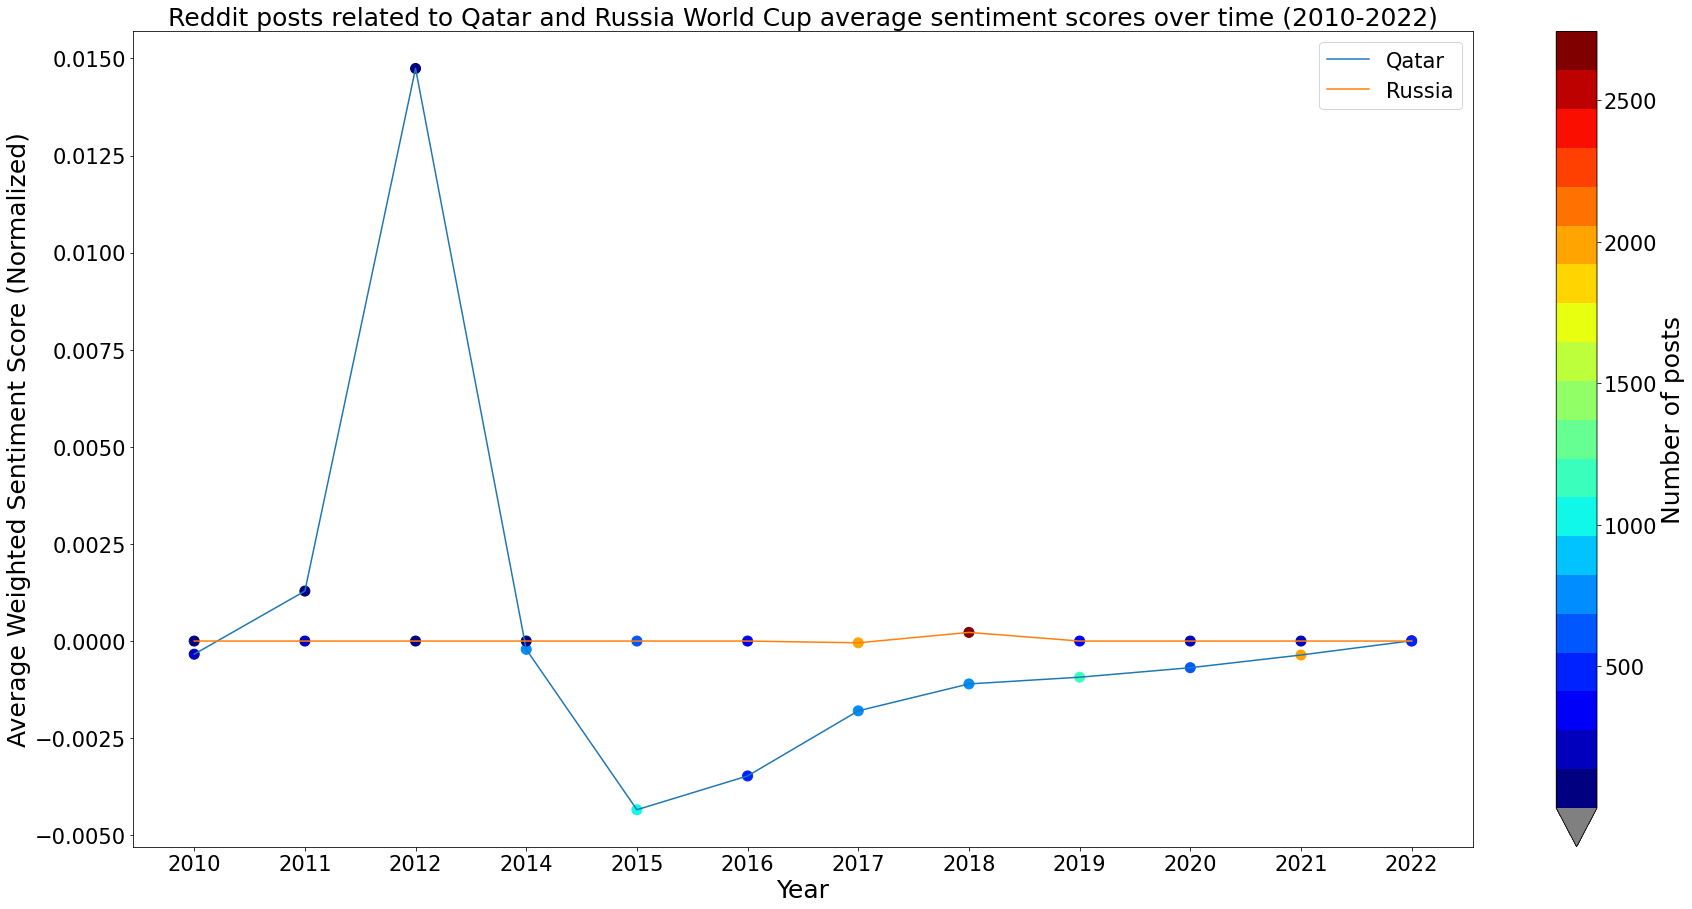

In [61]:
## visualize data 

# plot

from pylab import *

x = np.array(list_year_name)
y = np.array(list_avg_weighted_comp_sent)
z = np.array(list_num_posts)

x2 = np.array(list2_year_name)
y2 = np.array(list2_avg_weighted_comp_sent)
z2 = np.array(list2_num_posts)


cmap = plt.get_cmap('jet', 20)
cmap.set_under('gray')



fig, ax = plt.subplots()

cax = ax.scatter(x, y, c=z, s=100, cmap=cmap, vmin=0.1, vmax=z.max())
ax.plot(x,y,label='Qatar')

cax2 = ax.scatter(x2, y2, c=z2, s=100, cmap=cmap, vmin=0.1, vmax=z2.max())

ax.plot(x2,y2,label='Russia')

cbar = fig.colorbar(cax, extend='min')

cbar.ax.set_ylabel('Number of posts', fontsize=25, fontweight="medium")

plt.title("Reddit posts related to Qatar and Russia World Cup average sentiment scores over time (2010-2022)", fontsize=25, fontweight="medium")
plt.xlabel("Year", fontsize=25, fontweight="medium")
plt.ylabel("Average Weighted Sentiment Score (Normalized)", fontsize=25, fontweight="medium")
plt.rcParams.update({'font.size': 21})
plt.gcf().set_size_inches(30,15)
plt.legend(loc='best')


plt.show()


#plt.scatter(x,y,marker='o',s=200,c=z,cmap=cmap, vmin=0.1, vmax=z.max())





#plt.legend(loc='best')

#plt.plot(x,y)





#plt.fill_between(x, y-err, y+err)


#plt.errorbar(list_year_name, list_avg_weighted_comp_sent, yerr = list_sd_weighted_comp_sent)

# beautify the x-labels
#plt.gcf().autofmt_xdate()

#plt.gcf().set_size_inches(30,25)


#plt.show()









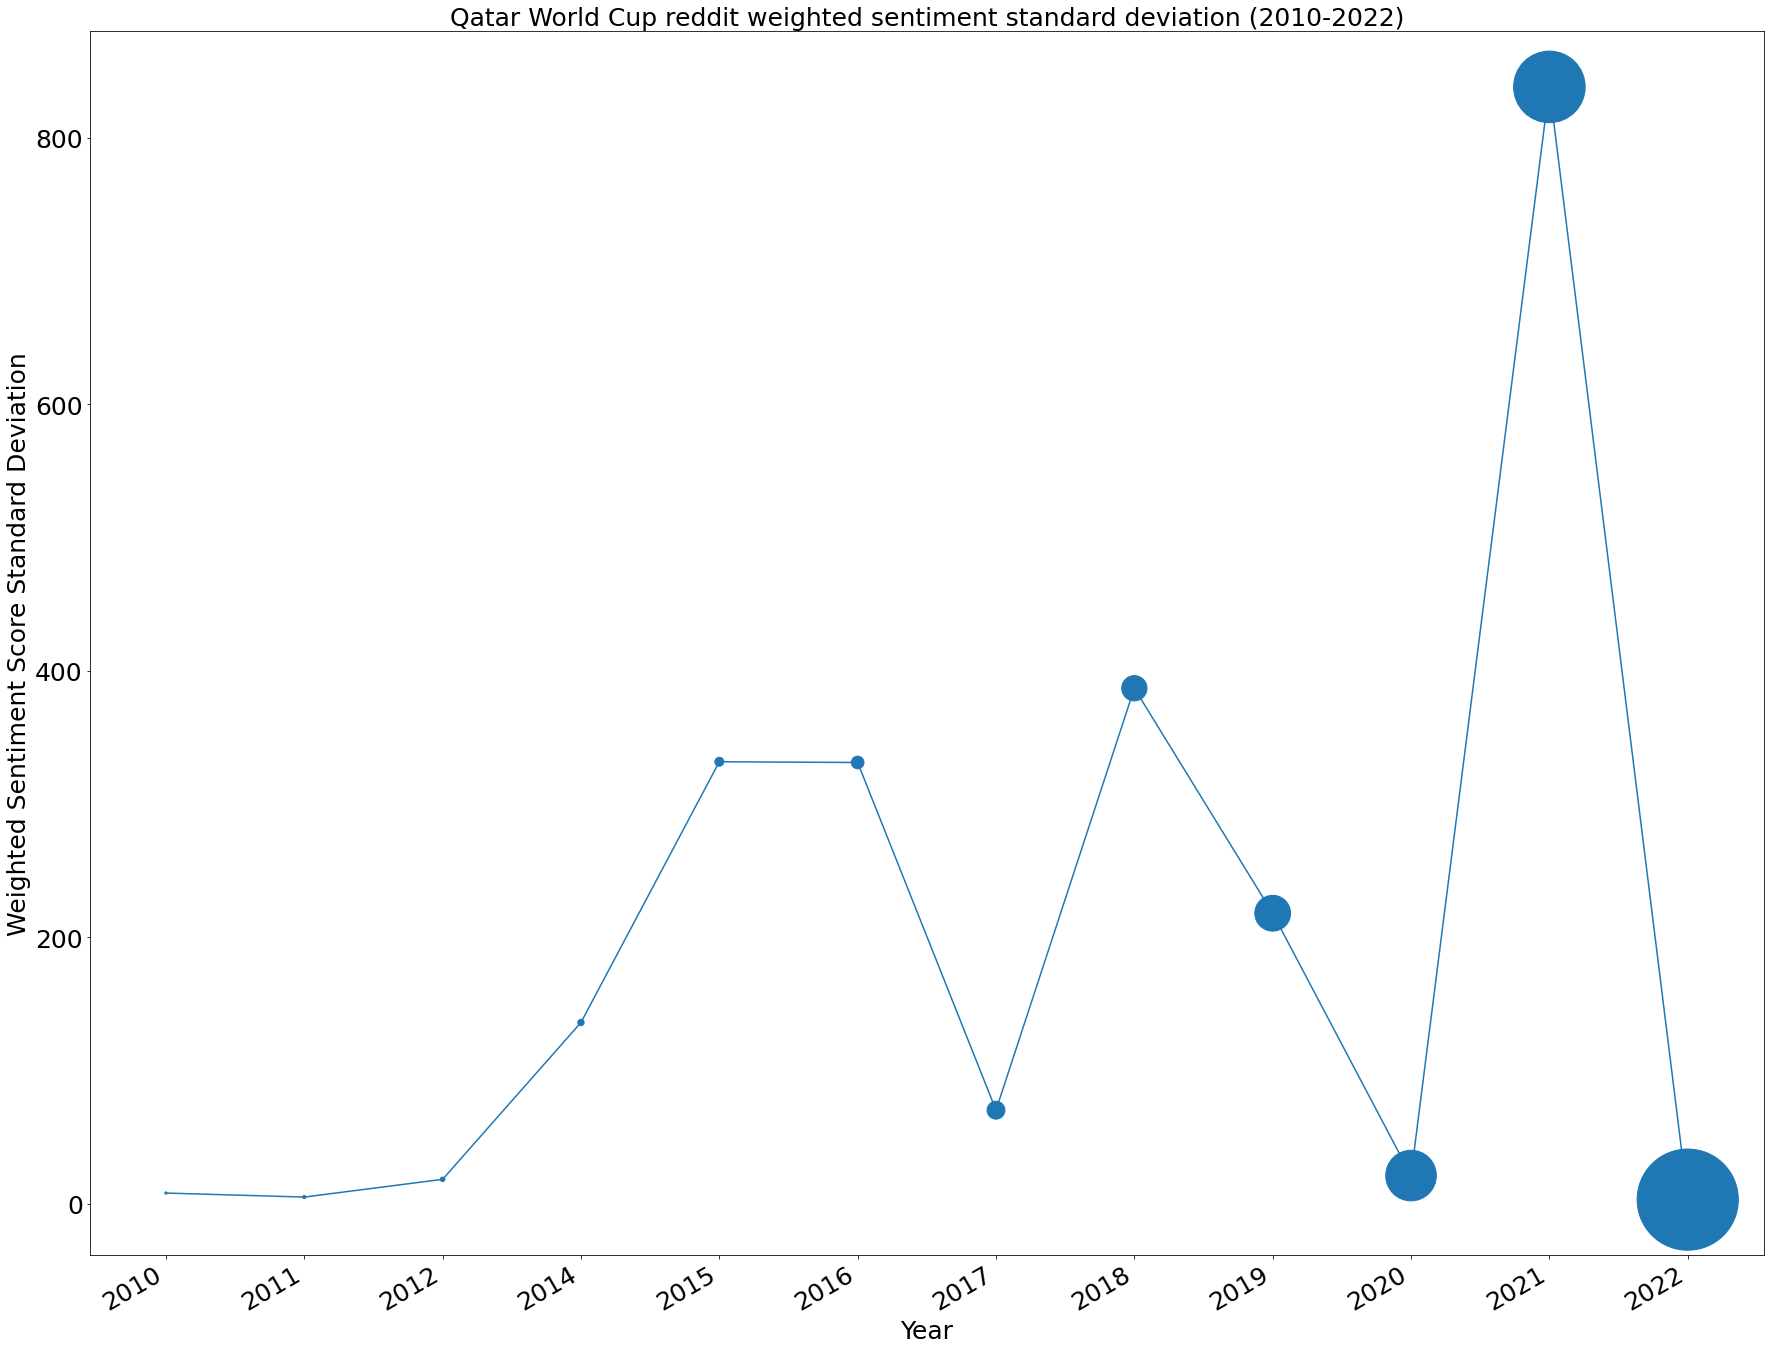

In [193]:


plt.scatter(x,list_sd_weighted_comp_sent,marker='o',s=ms)
plt.plot(x,list_sd_weighted_comp_sent)
#plt.errorbar(list_year_name, list_avg_weighted_comp_sent, yerr = list_sd_weighted_comp_sent)
plt.gcf().autofmt_xdate()

plt.gcf().set_size_inches(30,25)


plt.xlabel("Year", fontsize=25)
plt.ylabel("Weighted Sentiment Score Standard Deviation", fontsize=25)
plt.title("Qatar World Cup reddit weighted sentiment standard deviation (2010-2022)", fontsize=25)
plt.rcParams.update({'font.size': 25})

plt.show()

In [10]:
## get lists of weighted average sentiments, weighted average sentiment variance, total num posts by year

directory = "world_cup_reddit_data/posts/by_month"

dict_avg_weighted_comp_sent = {}
dict_sd_weighted_comp_sent = {}
dict_num_posts = {}
dict_month_name = {}


for f in sorted(os.listdir(directory)):
    if f!=".DS_Store":
        f = os.path.join(directory, f)
        df = pd.read_csv(f) 
        
        avg_weighted_comp_sent = (df["sentiment_score_compound"] * df["score"]).mean()
        sd_weighted_neu_sent = (df["sentiment_score_neutral"] * df["score"]).std()
        
        num_posts = len(df)
        
        month_title = f.replace(".csv", "").split("/")[3]
        year = month_title.split("-")[0] 
        month_num = month_title.split("-")[1]
        month_title = calendar.month_name[int(month_num)]
        
        if year not in dict_avg_weighted_comp_sent.keys():
            dict_avg_weighted_comp_sent[year] = []
            dict_avg_weighted_comp_sent[year] += [avg_weighted_comp_sent]
            
        else:
            dict_avg_weighted_comp_sent[year] += [avg_weighted_comp_sent]
            
            
        if year not in dict_num_posts.keys():
            dict_num_posts[year] = []
            dict_num_posts[year] += [num_posts]
        else:
            dict_num_posts[year] += [num_posts]
            
            
            
        if year not in dict_month_name.keys():
            dict_month_name[year] = []
            dict_month_name[year] += [month_title]
            
        else:
            dict_month_name[year] += [month_title]

        
        
       

      
        
        
        

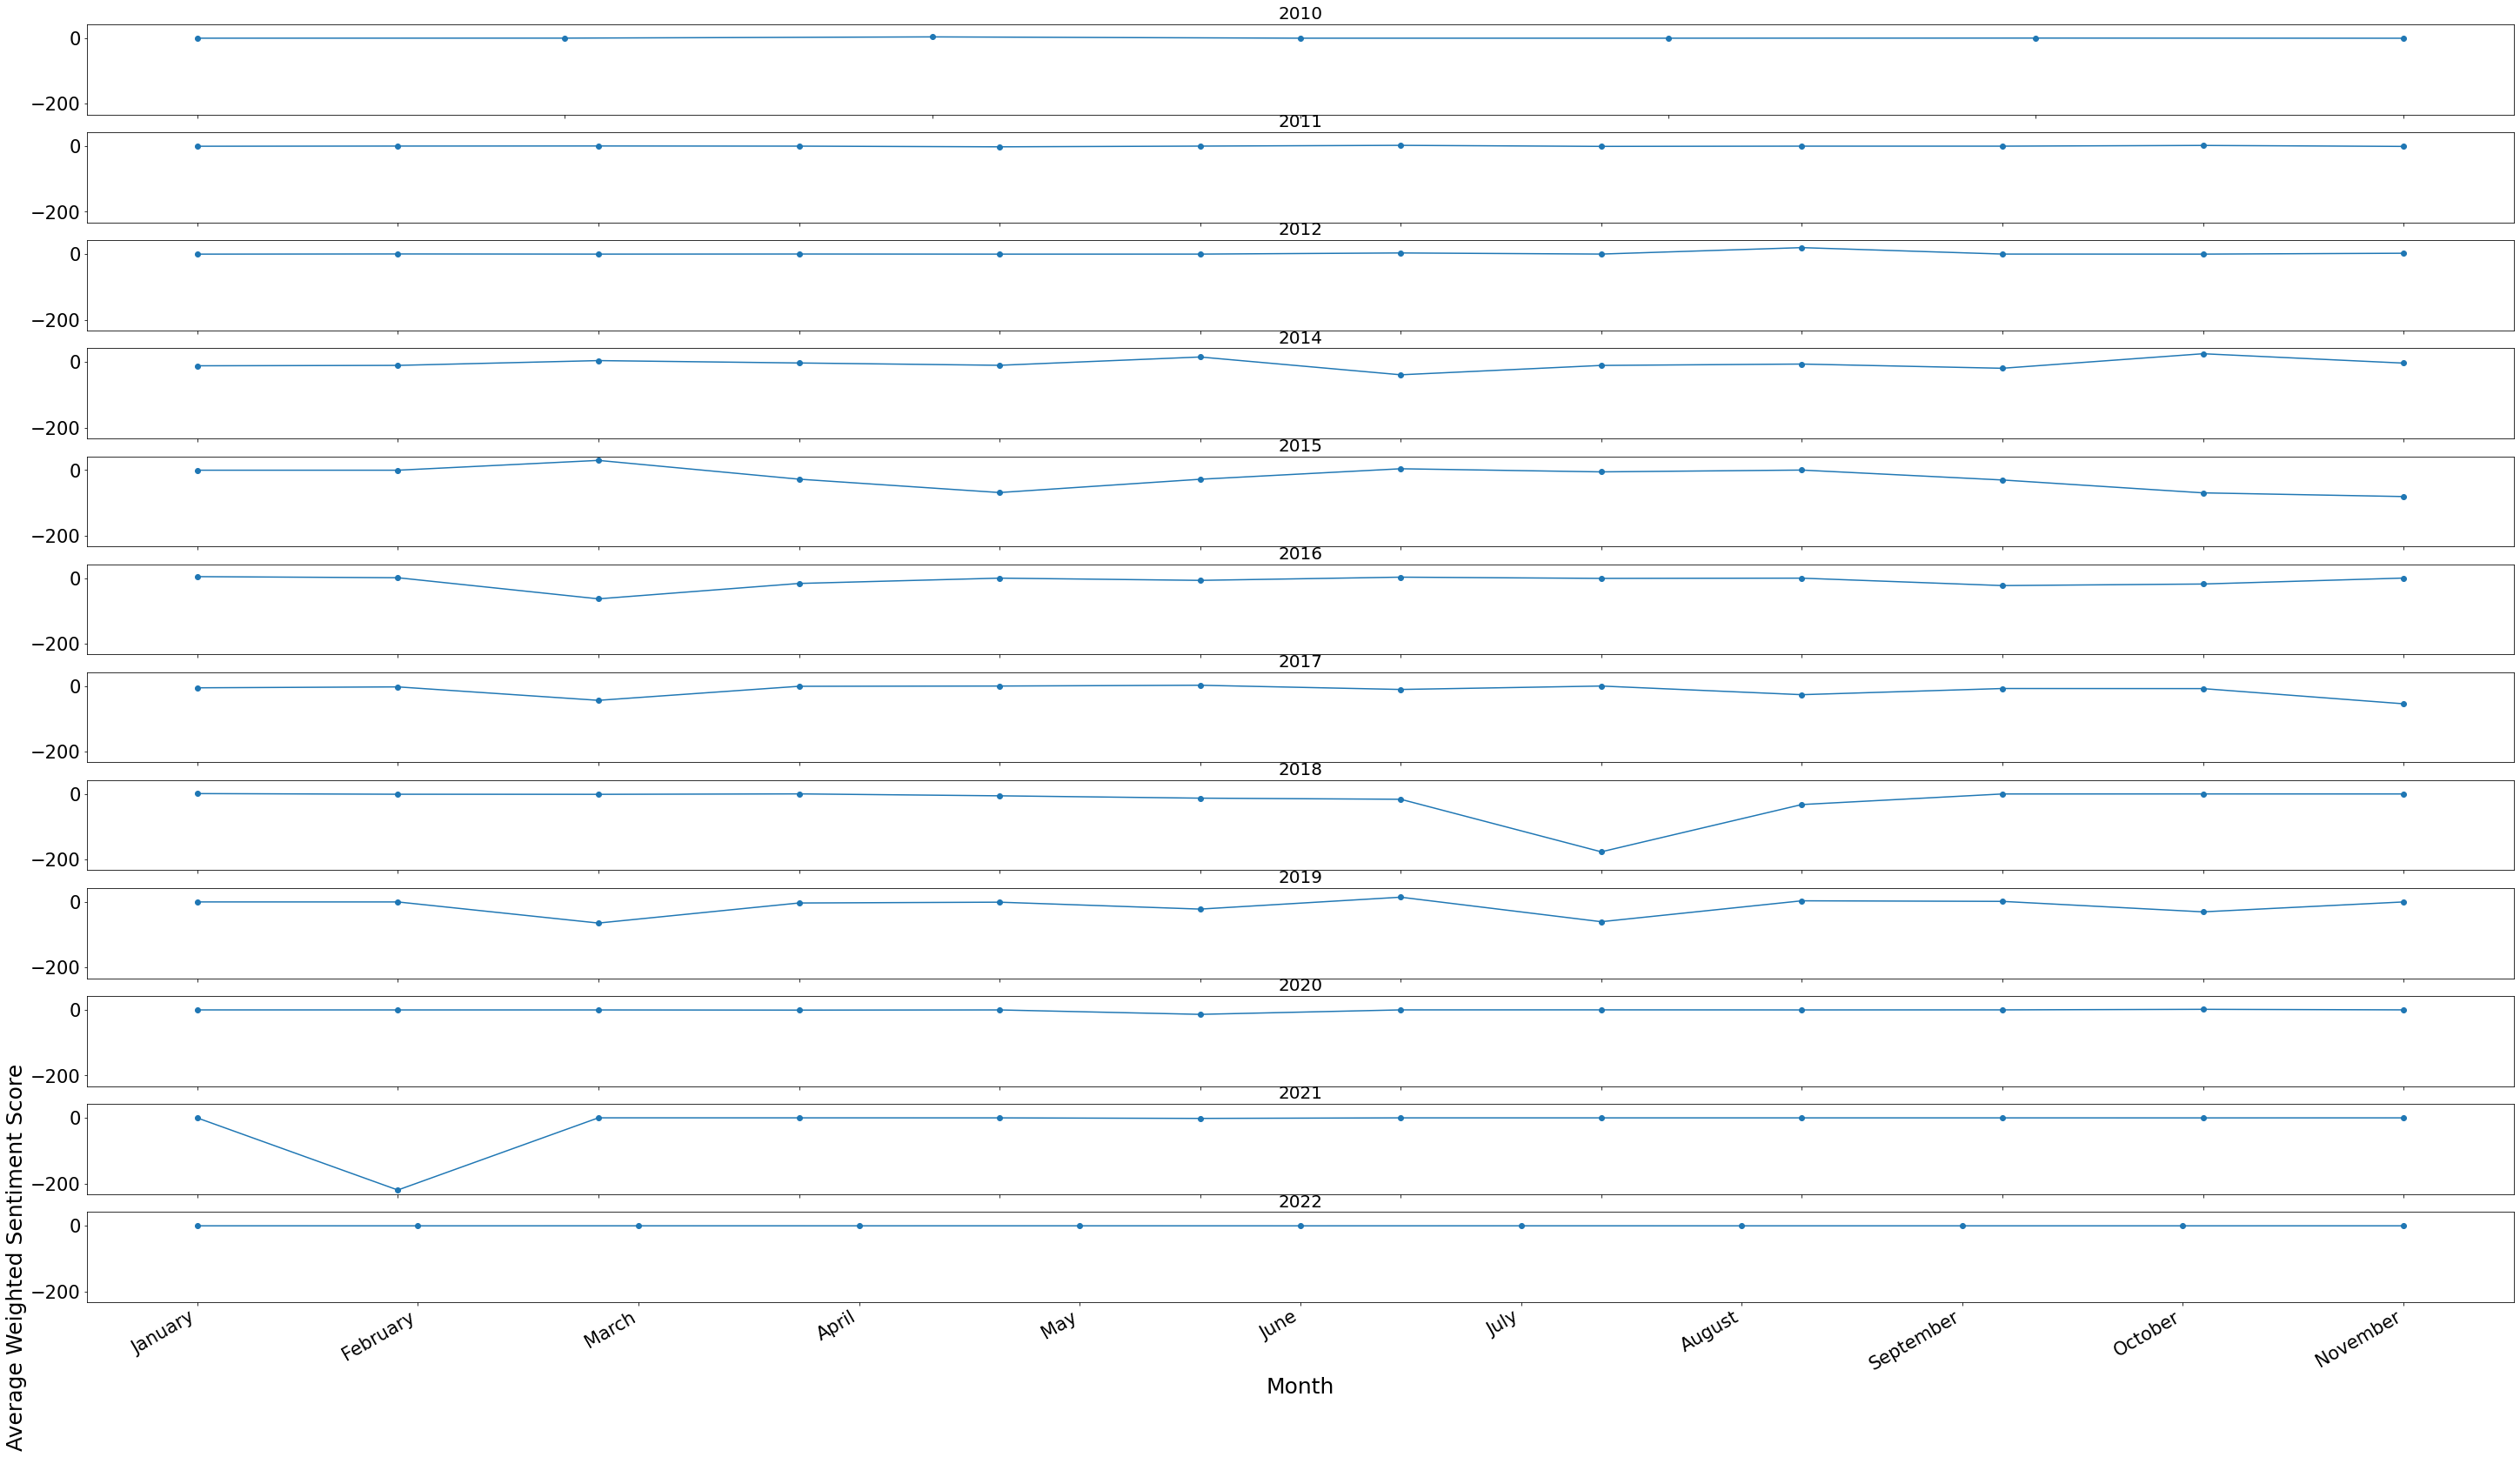

In [12]:
## visualize data 

# plot

fig, ax = plt.subplots(12, 1, sharey=True)

years = list(dict_month_name.keys())

for i in range (len(years)):
    
    year = years[i]
    x = np.array(dict_month_name[year])
    y = np.array(dict_avg_weighted_comp_sent[year])
    #err = np.array(list_sd_weighted_comp_sent)
    
    ms = [5*2**n for n in range(len(list_num_posts))]

    ax[i].set_title(year, fontsize=20, fontweight="medium")
    ax[i].scatter(x,y,marker='o')
    ax[i].plot(x,y)
    
    
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.gcf().set_size_inches(50,30)

plt.xlabel("Month", fontsize=25, fontweight="medium")
plt.ylabel("Average Weighted Sentiment Score", fontsize=25, fontweight="medium")
#axPres.yaxis.set_label_coords(-0.1,1.02)
plt.rcParams.update({'font.size': 25})


plt.show()
    

#plt.fill_between(x, y-err, y+err)


#plt.errorbar(list_year_name, list_avg_weighted_comp_sent, yerr = list_sd_weighted_comp_sent)










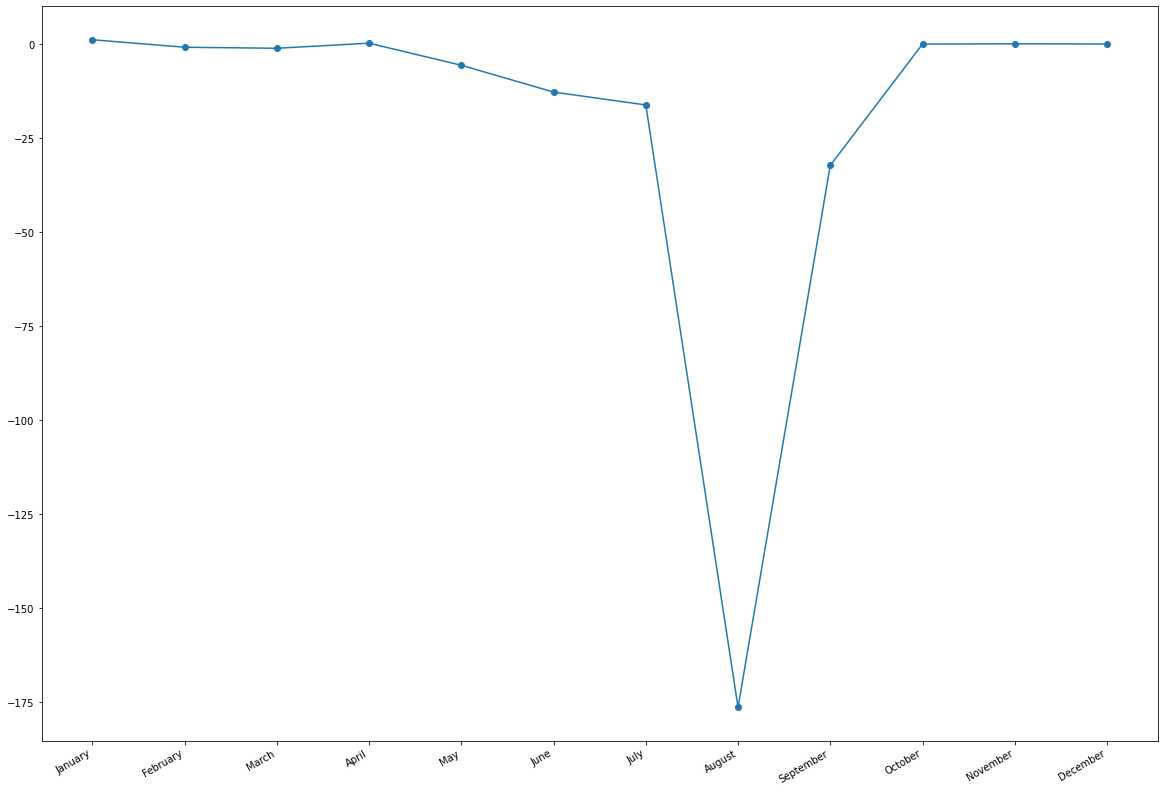

In [134]:
year = "2018"
x = np.array(dict_month_name[year])
y = np.array(dict_avg_weighted_comp_sent[year])
#err = np.array(list_sd_weighted_comp_sent)
    
ms = [5*2**n for n in range(len(list_num_posts))]

#plt.set_title(year)
plt.scatter(x,y,marker='o')
plt.plot(x,y)
plt.gcf().autofmt_xdate()

plt.gcf().set_size_inches(20,15)

In [ ]:

from datetime import datetime

import pandas as pd

years = [2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

limit = 1000

search_term = "qatar world cup"

title = "world cup"


for year in years:
    start_date = datetime(year, 1, 1, 0, 0)
    end_date = datetime(year+1, 1, 1, 0, 0)
    
    save_post_data(start_date, end_date, limit, search_term, "posts/by_year")
    for i in range (1,13):
        start_date = datetime(year, i, 1, 0, 0)
        print(str(start_date).split()[0])
        if i != 12:
            end_date = datetime(year, i+1, 1, 0, 0)
        else:
            end_date = datetime(year+1, 1, 1, 0, 0)
    
        save_post_data(start_date, end_date, limit, search_term, title, "posts/by_month")
        
                

In [ ]:
## get lists of weighted average sentiments, weighted average sentiment variance, total num posts by year

directory = "world_cup_reddit_data/posts/by_year"

dict_weighted_comp_sent = {}
dict_weighted_score_sent = {}


for f in sorted(os.listdir(directory)):
    if f!=".DS_Store":
        f = os.path.join(directory, f)
        df = pd.read_csv(f) 
        
        list_weighted_comp_sent = df["sentiment_score_compound"]
        list_weighted_score_sent = df["score"]
        year_name = f.replace(".csv", "").split("/")[3])
        
        dict_weighted_comp_sent[year_name] = list_weighted_comp_sent
        dict_weighted_score_sent[year_name] = list_weighted_score_sent
        
        num_posts = len(df)
        
        month_title = f.replace(".csv", "").split("/")[3]
        year = month_title.split("-")[0] 
        month_num = month_title.split("-")[1]
        month_title = calendar.month_name[int(month_num)]
        
        if year not in dict_avg_weighted_comp_sent.keys():
            dict_avg_weighted_comp_sent[year] = []
            dict_avg_weighted_comp_sent[year] += [avg_weighted_comp_sent]
            
        else:
            dict_avg_weighted_comp_sent[year] += [avg_weighted_comp_sent]
            
            
        if year not in dict_num_posts.keys():
            dict_num_posts[year] = []
            dict_num_posts[year] += [num_posts]
        else:
            dict_num_posts[year] += [num_posts]
            
            
            
        if year not in dict_month_name.keys():
            dict_month_name[year] = []
            dict_month_name[year] += [month_title]
            
        else:
            dict_month_name[year] += [month_title]

        
        
       

      
        
        
        

In [ ]:
from detoxify import Detoxify

# each model takes in either a string or a list of strings

results = Detoxify('original').predict('example text')

results = Detoxify('unbiased').predict(['example text 1','example text 2'])

results = Detoxify('multilingual').predict(['example text','exemple de texte','texto de ejemplo','testo di esempio','texto de exemplo','örnek metin','пример текста'])

In [ ]:


## GOAL: Try to predict score of post from post text 

## first (easier) step: take around 100 posts and scores 

## x = posts 

## y = scores 

## bag of words 

## tfidf 

## remove stopwords, do word stemming (general word cleaning)

## take list of strings to tfidf

## train random forest classifier to try to predict score 

## look at model.feature_importance to get most important columns in data 

## need test and train data 

## use scipy learn stratify on test and train data 

## maybe make 3 classes: 1 score, mid-trending (2-some number), super-trending ()

